# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [3]:
x1_train.shape

(1, 400)

In [4]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

# Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

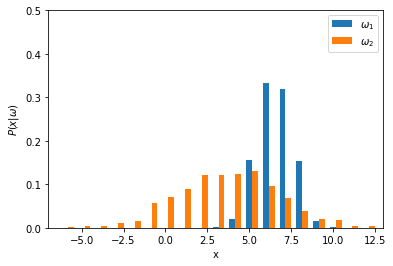

In [5]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [6]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
cnt1 = np.zeros((1, 2))
for i in range(train_x.shape[1]):
    if l[0, i] > l[1, i]:
        cnt1[0, 1] += test_x[1, i]
    else:
        cnt1[0, 0] += test_x[0, i]
print("number of all the misclassified: ", np.sum(cnt1), cnt1)
print("rate of err: {:.4f}".format(np.sum(cnt1) / np.sum(test_x)))
# end answer


number of all the misclassified:  64.0 [[ 3. 61.]]
rate of err: 0.2133


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

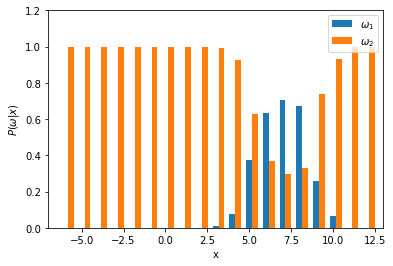

In [7]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [8]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
cnt2 = np.zeros((1, 2))
for i in range(train_x.shape[1]):
    if p[0, i] > p[1, i]:
        cnt2[0, 1] += test_x[1, i]
    else:
        cnt2[0, 0] += test_x[0, i]
print("number of all the misclassified: ", np.sum(cnt2), cnt2)
print("rate of err: {:.4f}".format(np.sum(cnt2) / np.sum(test_x)))
# end answer


number of all the misclassified:  47.0 [[15. 32.]]
rate of err: 0.1567


## Part 3 risk


In [9]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
r1 = cnt1[0, 0] * risk[1, 0] + cnt1[0, 1] * risk[0, 1]
r2 = cnt2[0, 0] * risk[1, 0] + cnt2[0, 1] * risk[0, 1]
print("maximum likelihood decision rule risk: ", r1)
print("optimal bayes decision rule risk: ", r2)
print("")
# end answer

maximum likelihood decision rule risk:  67.0
optimal bayes decision rule risk:  62.0

